In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-score-dataset-linear-regression/student_scores.csv


> I am considering a hypothesis where the number of hours will depend on the score.
> So, the independent variable is score and dependent variable is number of hours.
I'll apply the basic simple linear regression to this problem. Although there are many models to work with, I'll start with this as I'm in the learning stage.

In [2]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd

In [3]:
dataset = pd.read_csv('../input/students-score-dataset-linear-regression/student_scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434662


> Here the slope is positive which means the score increases with the increase in the number of hours. So my hypothesis is fairly correct.

> For every 1 hour rise in number of hours, the score will increase by 9.911.
If the student hasn't studied for a single hour, then his/her predicted score is 2.012.

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
print(regressor.predict([[9.5]]))

[96.16939661]


In [9]:
print(regressor.predict([[10]]))

[101.12472485]


# > If a person wants best score i.e. 100 then he/she has to study for 9.5 to 10 hours.

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105354

> The linear model is acceptable as the R2 value is very close to 1.

In [11]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


> This is a comparison between the predicted values of score on the test set and actual values of score on the test set itself.

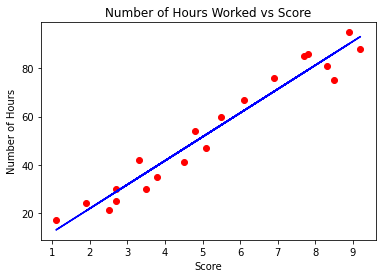

In [12]:
mlt.scatter(X_train, y_train, color = 'red')
mlt.plot(X_train, regressor.predict(X_train), color = 'blue')
mlt.title('Number of Hours Worked vs Score')
mlt.xlabel('Score')
mlt.ylabel('Number of Hours')
mlt.show()